## Equação de onda de segunda ordem por FFT

### Equação de onda de segunda ordem  em 2-D via FFT

Resolvemos a equação de onda em 2-d
$$u_{tt}=u_{xx}+u_{yy},\quad -1<x,y<1,t>0$$
com
$u=0$ na fronteira
e condições iniciais:
$$u(x,y,0)=e^{-40((x-0.4)^2+y^2)},u_t(x,y,0)=0$$

Código baseado no do livro de L. Trefthen, Spectral Methods with Matlab.(p20.m)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import meshgrid,cos,pi,round,exp,real,remainder,zeros,fliplr,flipud,array,arange
from numpy.fft import fft, ifft
from matplotlib.pyplot import subplot, figure ,title,axis
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel
from matplotlib import cm
from scipy.interpolate import interp2d

/tmp/ipykernel_10371/1943311845.py:20: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f   = interp2d(x,y,vv,kind='cubic');
/tmp/ipykernel_10371/1943311845.py:22: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use

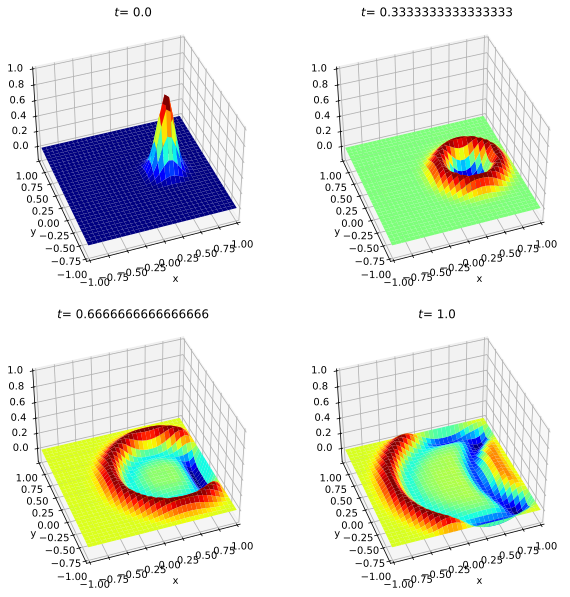

In [2]:
# Grid and inital Data:
N       = 24
x       = cos(pi*arange(0,N+1)/N)
y       = x
t       = 0.0
dt      = (6.0)/(N**2)
xx, yy  = meshgrid(x,y)
plotgap = int (round( (1.0/3.0) / (dt)))
dt      = (1.0/3.0)/(plotgap)  
vv      = exp(-40*((xx - 0.4)**2 + yy**2))
vvold   = vv; 

#Time stepping Leapfrog Formula:
fig = figure(figsize=(10,10))
k   = 1;
for n in range(0,(3*plotgap)+1):
    t = n*dt;
    if (remainder(n+0.5,plotgap) < 1):
        ax  = fig.add_subplot(2,2,k,projection ='3d')
        f   = interp2d(x,y,vv,kind='cubic');
        xxx = arange(-1.,1.+1./16,1./16);
        vvv = f(xxx,xxx)
        X,Y = meshgrid(xxx,xxx);
        ax.plot_surface(X,Y,vvv,rstride=1,cstride=1,cmap=cm.jet)
        ax.set_zlim3d([-0.15,1])
        ax.set_xlim3d([-1,1])
        ax.set_ylim3d([-1,1])
        ax.view_init(elev=40., azim=250.)
        title("$ t $= " +str(t))
        xlabel("x"); ylabel("y");
        k   = k+1;
    
    uxx  = zeros((N+1,N+1))
    uyy  = zeros((N+1,N+1));
    ii   = arange(1,N);
    
    for i in range(1,N):
        v       = vv[i,:]        
        V       = list(v) + list(flipud(v[ii]))
        U       = real(fft(V))
        w1_hat  = 1j*zeros(2*N)
        w1_hat[0:N] = 1j*arange(0,N)
        w1_hat[N+1:] = 1j*arange(-N+1,0)
        W1      = real(ifft(w1_hat * U))
        w2_hat  = 1j*zeros(2*N);
        w2_hat[0:N+1] = arange(0,N+1)
        w2_hat[N+1:] = arange(-N+1,0)
        W2      = real(ifft((-w2_hat**2) * U))
        uxx[i,ii] = W2[ii]/(1 - x[ii]**2) - (x[ii]*W1[ii])/(1 - x[ii]**2)**(3.0/2);
    for j in range(1,N):
        v       = vv[:,j]; 
        V       = list(v) + list(flipud(v[ii]));
        U       = real(fft(V))
        w1_hat  = 1j*zeros(2*N)
        w1_hat[0:N] = 1j*arange(0,N)
        w1_hat[N+1:] = 1j*arange(-N+1,0)
        W1      = real(ifft(w1_hat * U))
        w2_hat  = 1j*zeros(2*N);
        w2_hat[0:N+1] = arange(0,N+1)
        w2_hat[N+1:] = arange(-N+1,0)
        W2      = real(ifft(-(w2_hat**2) * U))
        uyy[ii,j] = W2[ii]/(1 - y[ii]**2) - y[ii]*W1[ii]/(1 - y[ii]**2)**(3.0/2.0);
    vvnew = 2*vv - vvold + dt**2 *(uxx + uyy)
    vvold = vv
    vv    = vvnew

Ref.: L. Trefthen, _Spectral Methods with Matlab_.